## Encoding via Shape

**Shape is a good encoding for categorical variables**, using one shape for each level of the categorical variable. Unfortunately, there is no built-in way to automatically assign different shapes in a single call of the **scatter or regplot** function. Instead, we need to write a loop to call our plotting function multiple times, isolating data points by categorical level and setting a different "marker" argument value for each one.

In [24]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('../Code/fuel-econ.csv')
sedan_classes = ['Minicompact Cars','Subcompact Cars','Compact Cars','Midsize Cars','Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
df.VClass = df.VClass.astype(vclasses)
df['trans_type'] = df.trans.apply(lambda x: x.split()[0])
df.head()


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


We will create a scatter plot of fuel mileage against engine size. I will take a random subset of 200 cars to reduce over-plotting and combine that with a small amount of horizontal jitter.

To answer are there differences between cars with automatic transmission and manual transmission in terms of fuel efficiency and engine size,I will use shape to encode it.


In [25]:
sample = np.random.choice(df.shape[0], 200, replace = False)
subset_df = df.loc[sample]

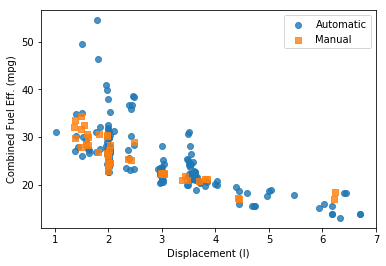

In [31]:
ttype_markers = [['Automatic','o'],['Manual','s']]

for cat,marker in ttype_markers:
    df_cat = subset_df.loc[subset_df['trans_type']==cat]
    sb.regplot(data=df_cat, x = 'displ', y = 'comb', 
              x_jitter = 0.04, fit_reg = False, marker = marker)
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.legend(['Automatic','Manual'])

The **'o'** string specifies circular markers for members of category 'Automatic', while the **'s'** string specifies square markers for members of category 'Manual'. The legend function adds a legend to the plot, with one marker for every scatter call made. The function argument sets the labels for those points.